In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les données à partir du fichier texte
data = np.loadtxt('TP2 ex2data1.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1]
X.shape
y.shape

(100,)

In [1]:
def scale(x):
    x_scaled = x - np.mean(x, axis=0)
    x_scaled = x_scaled / np.std(x_scaled, axis=0)
    return x_scaled

In [54]:
def fitGradientDesc(x,y):
    alpha = 0.01
    # stock les erreur
    cost=[]
    theta = np.zeros((1+x.shape[1]))
    n = x.shape[0]
    for i in range(200000):
        # la fonction sigmoïde
        y_pred = 1/( 1 + np.exp(-theta[0] - np.dot(x,theta[1:])) )
        
        # e la fonction de coût 
        mse = (-1/n)*np.sum(((y*np.log(y_pred)) + ((1-y)*np.log(1-y_pred))))
        
        cost.append(mse)
        # calcule Drivee
        d_theta1 = (1/n)*np.dot(np.transpose(x),(y_pred - y))
        d_theta0 = (1/n)*np.sum((y_pred-y))
       
        # mise a jour
        theta[1:] = theta[1:] - alpha *d_theta1
        theta[0] = theta[0] - alpha *d_theta0
         
    # print(cost)
    return theta ,mse , min(cost)
t = fitGradientDesc(X,y)
t[0],t[1],t[2]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15004\3045341941.py:12: RuntimeWarning: divide by zero encountered in log
  mse = (-1/n)*np.sum(((y*np.log(y_pred)) + ((1-y)*np.log(1-y_pred))))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15004\3045341941.py:12: RuntimeWarning: invalid value encountered in multiply
  mse = (-1/n)*np.sum(((y*np.log(y_pred)) + ((1-y)*np.log(1-y_pred))))


[-38.08504277   0.31339074   0.29872692]


(array([-59.80933427,   0.47415875,   0.46991122]),
 0.3107615673052597,
 0.22187240132265357)

In [55]:
t[0]

array([-59.80933427,   0.47415875,   0.46991122])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15004\703569965.py:29: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,


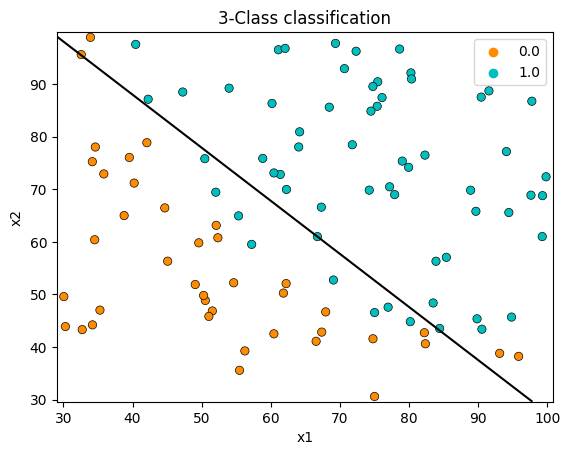

In [56]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['white', 'black', 'blue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

# t=[-24.06051097  , 0.1906839  ,  0.19415147]
# Z = t[0]+t[1]*np.array(xx)+t[2]*np.array(yy)

Z = t[0][0]+t[0][1]*np.array(xx)+t[0][2]*np.array(yy)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.contour(xx, yy, Z, levels=[0.5], colors='k')
# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification")
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()